We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:
1.fitting it to the periodic function
2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 


In [1]:
import numpy as np

Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Temperature ($^\\circ$C)')

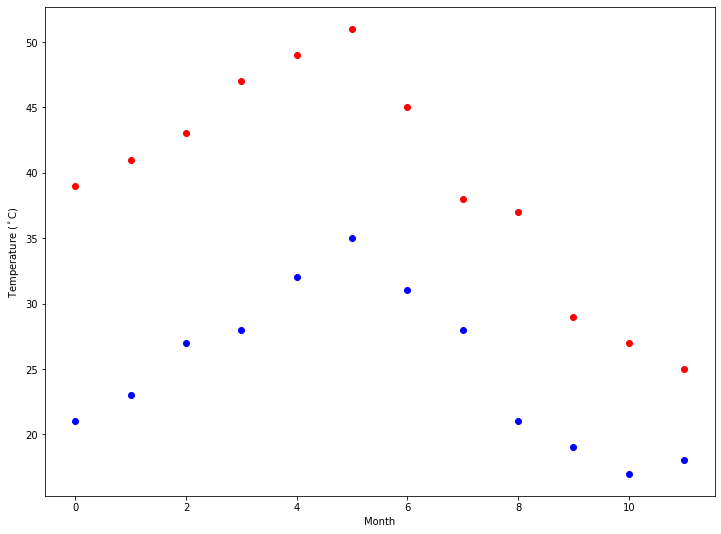

In [2]:
import matplotlib.pyplot as plt
months = np.arange(12)
# plt.Figure.set_size_inches=(4,3)
plt.rcParams["figure.figsize"] = (12,9)
plt.plot(months, Max, 'ro')
plt.plot(months, Min, 'bo')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

In [3]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2* np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max)
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min)

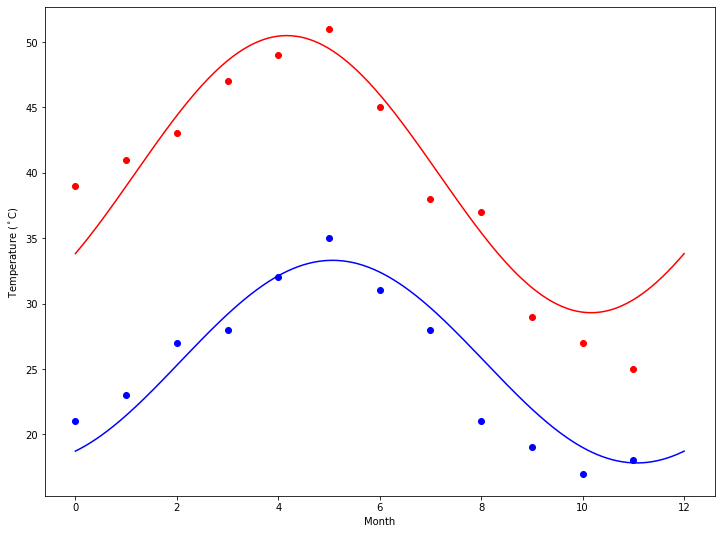

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


This assignment is for visualization using matplotlib:
data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url,skip_blank_lines=True, usecols= ['sex','age','fare'])

In [6]:
titanic.head()

,sex,age,fare
0,female,29.0000,211.3375
1,male,0.9167,151.5500
2,female,2.0000,151.5500
3,male,30.0000,151.5500
4,female,25.0000,151.5500


Text(0.5, 1.0, 'Fare paid and the Age')

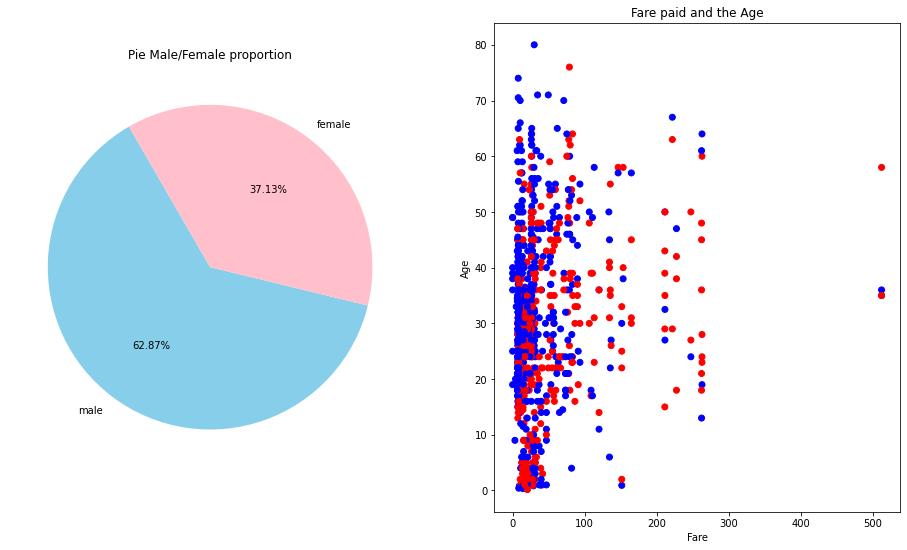

In [9]:
'''1. Create a pie chart presenting the male/female proportion'''

count=titanic['sex'].value_counts()
colors = ['skyblue', 'pink']
plt.rcParams["figure.figsize"] = (16,9)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=120,
        autopct='%.2f%%')
ax1.set_title('Pie Male/Female proportion')

# '''2. Create a scatterplot with the Fare paid and the Age, 
# differ the plot color by gender'''

colors = {'male':'blue', 'female':'red'}
titanic = titanic.dropna()

ax2.scatter( titanic.fare, titanic.age, c=titanic['sex'].apply(lambda x: colors[x]))

ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')
